<a href="https://colab.research.google.com/github/arjunjanamatti/loan_defector/blob/master/multi_class_classification/scoring_model_multiclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('seaborn-whitegrid')

### Load Dataframe

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# /content/drive/My Drive/Colab Notebooks/training_sampled_data.csv
raw_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/training_sampled_data.csv')
print('Shape of dataframe: ', raw_df.shape)
raw_df.head()

Shape of dataframe:  (1012, 13)


,h1_score,h2_score,h3_score,h4_score,h5_score,h6_score,text_score,title_score,desc_score,domain_score,path_score,alt_img_score,label
0,0.000000,0.516252,0.459713,0.0,0.0,0.0,0.000000,0.173604,0.000000,0.960711,0.954300,0.0,Above average
1,0.962087,0.000000,0.000000,0.0,0.0,0.0,0.248726,0.599811,0.582049,0.000000,0.962087,0.0,Below average
2,0.962087,0.000000,0.000000,0.0,0.0,0.0,0.248726,0.599811,0.582049,0.000000,0.962087,0.0,Below average
3,0.804756,0.000000,0.000000,0.0,0.0,0.0,0.676669,0.000000,0.753189,0.000000,0.929136,0.0,Above average
4,0.805614,0.000000,0.000000,0.0,0.0,0.0,0.639532,0.000000,0.750814,0.000000,0.928806,0.0,Average


In [ ]:
# dropping rows with ' --'
raw_df_1 = raw_df[raw_df.label != ' --']
raw_df_1_copy = raw_df_1.copy()
print('Shape of dataframe: ', raw_df_1.shape)

Shape of dataframe:  (869, 13)


In [ ]:
raw_df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 869 entries, 0 to 1011
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   h1_score       869 non-null    float64
 1   h2_score       869 non-null    float64
 2   h3_score       869 non-null    float64
 3   h4_score       869 non-null    float64
 4   h5_score       869 non-null    float64
 5   h6_score       869 non-null    float64
 6   text_score     869 non-null    float64
 7   title_score    869 non-null    float64
 8   desc_score     869 non-null    float64
 9   domain_score   869 non-null    float64
 10  path_score     869 non-null    float64
 11  alt_img_score  869 non-null    float64
 12  label          869 non-null    object 
dtypes: float64(12), object(1)
memory usage: 95.0+ KB


In [ ]:
raw_df_1.describe().T

,count,mean,std,min,25%,50%,75%,max
h1_score,869.0,0.115894,0.277930,0.0,0.000000,0.000000,0.000000,0.962087
h2_score,869.0,0.273280,0.296485,0.0,0.000000,0.139882,0.460384,0.963181
h3_score,869.0,0.269234,0.325580,0.0,0.000000,0.098016,0.661597,0.960544
h4_score,869.0,0.011647,0.092152,0.0,0.000000,0.000000,0.000000,0.959359
h5_score,869.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
h6_score,869.0,0.020552,0.098849,0.0,0.000000,0.000000,0.000000,0.718614
text_score,869.0,0.381590,0.328835,0.0,0.000000,0.372286,0.689674,0.955433
title_score,869.0,0.326399,0.298087,0.0,0.000000,0.345149,0.500768,0.961949
desc_score,869.0,0.401051,0.279005,0.0,0.240821,0.358471,0.513008,0.958261
domain_score,869.0,0.276322,0.316352,0.0,0.000000,0.000000,0.526505,0.962087


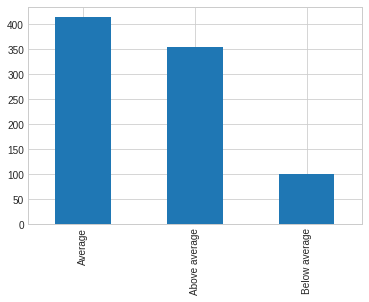

In [ ]:
raw_df_1['label'].value_counts().plot.bar()

In [ ]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
raw_df_1['label'] = labelencoder.fit_transform(raw_df_1['label'])
raw_df_1.head()

,h1_score,h2_score,h3_score,h4_score,h5_score,h6_score,text_score,title_score,desc_score,domain_score,path_score,alt_img_score,label
0,0.000000,0.516252,0.459713,0.0,0.0,0.0,0.000000,0.173604,0.000000,0.960711,0.954300,0.0,0
1,0.962087,0.000000,0.000000,0.0,0.0,0.0,0.248726,0.599811,0.582049,0.000000,0.962087,0.0,2
2,0.962087,0.000000,0.000000,0.0,0.0,0.0,0.248726,0.599811,0.582049,0.000000,0.962087,0.0,2
3,0.804756,0.000000,0.000000,0.0,0.0,0.0,0.676669,0.000000,0.753189,0.000000,0.929136,0.0,0
4,0.805614,0.000000,0.000000,0.0,0.0,0.0,0.639532,0.000000,0.750814,0.000000,0.928806,0.0,1


### Correlation matrix and Heatmaps

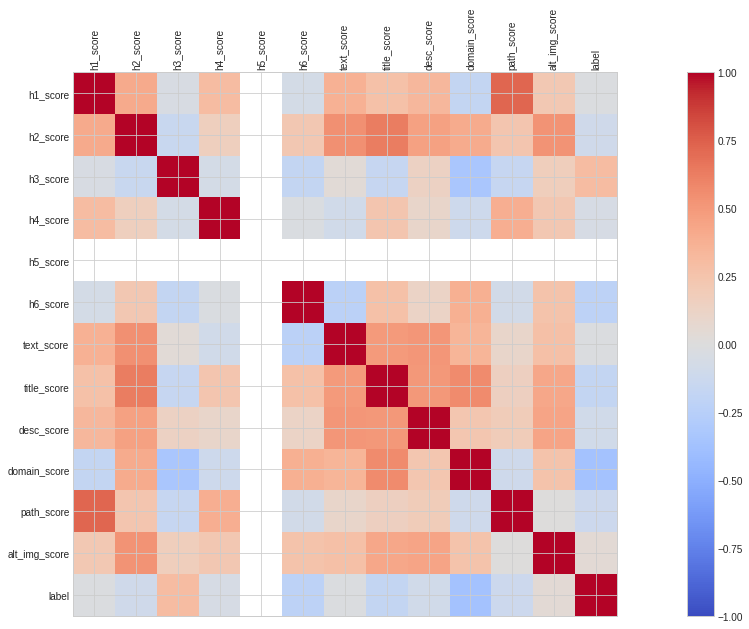

In [ ]:
corr = raw_df_1.corr()

fig = plt.figure(figsize = (25,10))
ax = fig.add_subplot(1,1,1)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(raw_df_1.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(raw_df_1.columns)
ax.set_yticklabels(raw_df_1.columns)
plt.show()

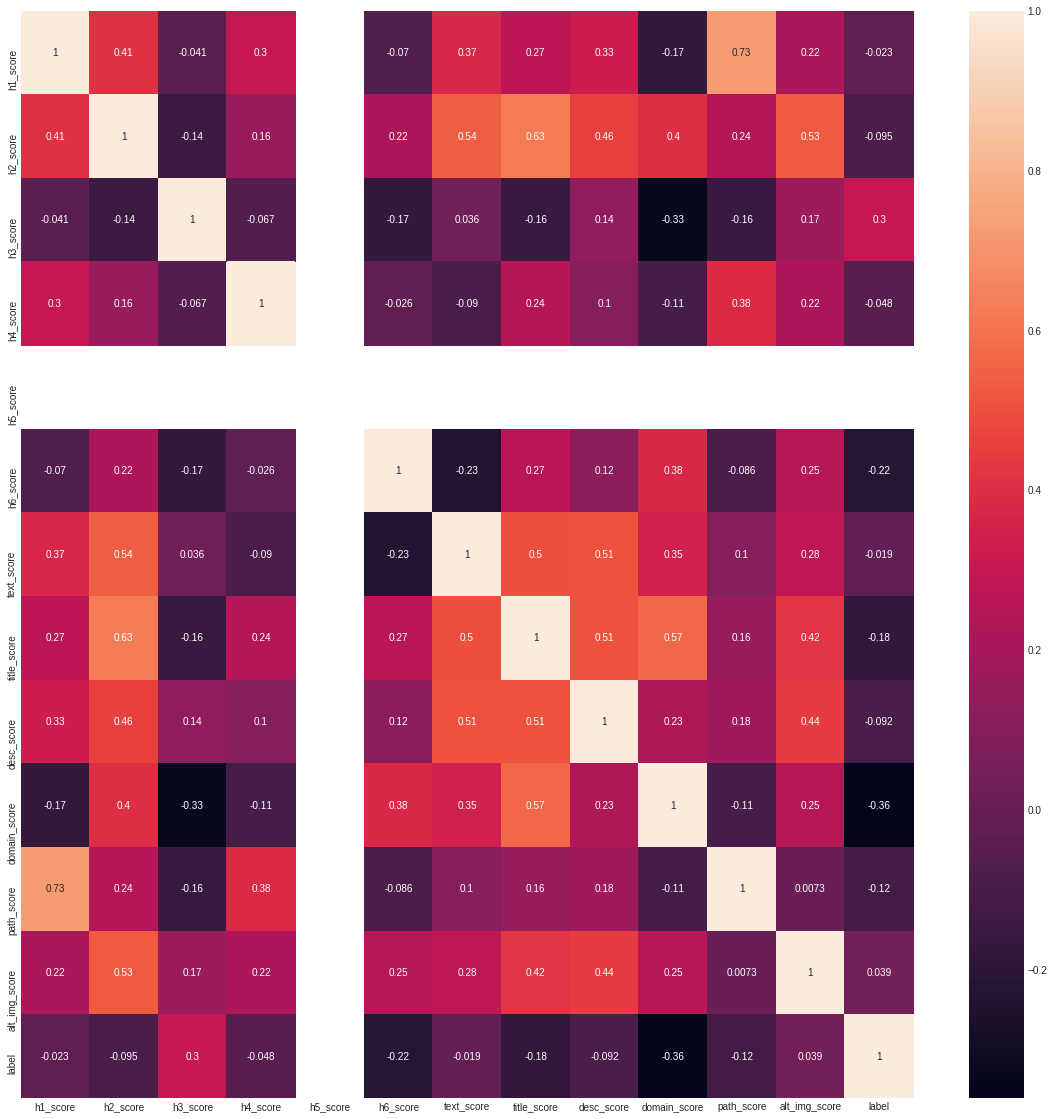

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(raw_df_1.corr(), annot=True)
plt.show()

### Handling Imbalance

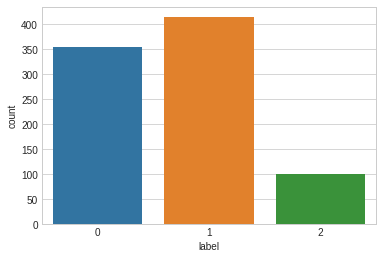

In [ ]:
sns.countplot(raw_df_1['label'], label = 'Count')
plt.show()
# ['above average': '0',
#  'below average': '2',
#  'average': '1']

In [ ]:


# class count
class_count_0, class_count_1, class_count_2 = raw_df_1['label'].value_counts()

# Separate class
class_0 = raw_df_1[raw_df_1['label'] == 0]
class_1 = raw_df_1[raw_df_1['label'] == 1]
class_2 = raw_df_1[raw_df_1['label'] == 2]

# print the shape of the class
print('above average:', class_0.shape)
print('average:', class_1.shape)
print('below average:', class_2.shape)

above average: (354, 13)
average: (414, 13)
below average: (101, 13)


In [ ]:
import imblearn
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from collections import Counter 

In [ ]:
raw_df_1_array = raw_df_1.values 
X = raw_df_1.iloc[:,:-1]
y = raw_df_1.iloc[:,-1:]

In [ ]:
tome_links = TomekLinks(sampling_strategy = 'majority')

x_tome_links, y_tome_links = tome_links.fit_resample(X, y)

print('Original dataset shape', (y.value_counts()))
print('Resample dataset shape', Counter(y_tome_links))

Original dataset shape label
1        414
0        354
2        101
dtype: int64
Resample dataset shape Counter({1: 393, 0: 354, 2: 101})


In [ ]:
smote = SMOTE()

x_smote, y_smote = smote.fit_resample(X, y)
print('Original dataset shape', (y.value_counts()))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape label
1        414
0        354
2        101
dtype: int64
Resample dataset shape Counter({0: 414, 2: 414, 1: 414})


In [ ]:
near_miss = NearMiss()
x_near_miss, y_near_miss = near_miss.fit_resample(X, y)
print('Original dataset shape', (y.value_counts()))
print('Resample dataset shape', Counter(y_near_miss))

Original dataset shape label
1        414
0        354
2        101
dtype: int64
Resample dataset shape Counter({0: 101, 1: 101, 2: 101})


### Machine Learning Algorithms

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import scorer, accuracy_score, f1_score, confusion_matrix, recall_score, precision_score, roc_auc_score
from sklearn.model_selection import train_test_split

In [ ]:
def model_result(X_train, X_test, y_train, y_test, model):
  model_1 = model
  model_1.fit(X_train, y_train)
  precise_score = precision_score(y_true = y_test, y_pred = model_1.predict(X_test),average = 'macro')
  rec_score = recall_score(y_true = y_test, y_pred = model_1.predict(X_test),average = 'macro',)
  print('Precision score: {}% '.format(round(precise_score*100, 2)))
  print('Recall score: {}% '.format(round(rec_score*100, 2)))
  sns.heatmap(confusion_matrix(y_true = y_test, y_pred = model_1.predict(X_test)), annot = True)
  plt.show()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_near_miss, X_test_near_miss, y_train_near_miss, y_test_near_miss = train_test_split(x_near_miss, y_near_miss, test_size=0.2, random_state=42)
X_train_tome_links, X_test_tome_links, y_train_tome_links, y_test_tome_links = train_test_split(x_tome_links, y_tome_links, test_size=0.2, random_state=42)
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(x_smote, y_smote, test_size=0.2, random_state=42)

* __Recall_score__: Is the proportion of correct predicted labels to the total number of actual labels, averaged over instances.
* __Precision_score__:  The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

Results of imbbalanced dataset: 
Precision score: 84.39% 
Recall score: 69.47% 


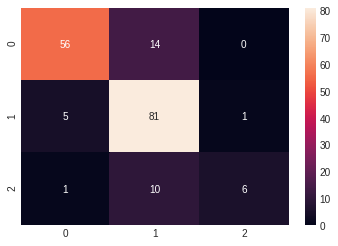


Results of nearMiss balancing: 
Precision score: 72.14% 
Recall score: 72.11% 


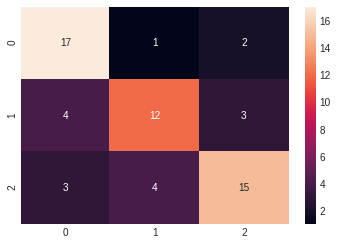


Results of TomeLinks balancing: 
Precision score: 81.9% 
Recall score: 70.01% 


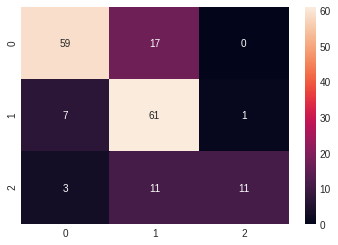


Results of SMOTE balancing: 
Precision score: 82.29% 
Recall score: 81.86% 


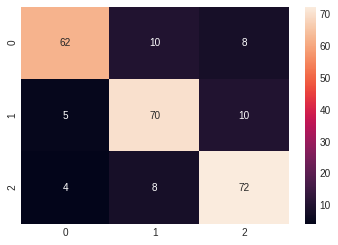

In [ ]:
print('Results of imbbalanced dataset: ')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_result(X_train, X_test, y_train, y_test, model = XGBClassifier())
print()
print('Results of nearMiss balancing: ')
X_train, X_test, y_train, y_test = train_test_split(x_near_miss, y_near_miss, test_size=0.2, random_state=42)
model_result(X_train, X_test, y_train, y_test, model = XGBClassifier())
print()
print('Results of TomeLinks balancing: ')
X_train, X_test, y_train, y_test = train_test_split(x_tome_links, y_tome_links, test_size=0.2, random_state=42)
model_result(X_train, X_test, y_train, y_test, model = XGBClassifier())
print()
print('Results of SMOTE balancing: ')
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.2, random_state=42)
model_result(X_train, X_test, y_train, y_test, model = XGBClassifier())

* Recall score is highest for imbalance dataset handled by SMOTE for XGBClassifier model.
* Recall score is more reliable, the precision score is highest for imbalanced dataset, this may be due to the fact it is able to predict above average correctly, since this is a significant number, it may not give the true picture.

### Artificial Neural Network

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [ ]:
X = raw_df_1_copy.iloc[:,:-1]
y = raw_df_1_copy.iloc[:,-1:]
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = tf.keras.utils.to_categorical(encoded_Y)
 
# function for sequential model
# input dimension is the number of features
# number of categories in output is 3
def sequential_model():
  model = Sequential()
  model.add(Dense(64, input_dim = 12, activation = 'relu'))
  model.add(Dropout(rate = 0.2))
  model.add(Dense(3, activation = 'softmax'))
  # compiling the model
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model
 
estimator = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn = sequential_model, 
                                                           epochs = 100, 
                                                           batch_size = 32, 
                                                           verbose = 0)
kfold = KFold(n_splits=10, 
              shuffle=True)
results = cross_val_score(estimator, 
                          X, 
                          dummy_y, 
                          cv=kfold,)
print("Average accuracy: %.2f%%, Standard deviation across results: %.2f%%" % (results.mean()*100, results.std()*100))

Average accuracy: 73.65%, Standard deviation across results: 2.52%


In [ ]:
# x_smote, y_smote
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.1, random_state=42)
dummy_y_train = tf.keras.utils.to_categorical(y_train)
dummy_y_test = tf.keras.utils.to_categorical(y_test)
ann_model = sequential_model()
ann_model.fit(X_train, dummy_y_train, epochs = 500, batch_size=32, validation_data= (X_test, dummy_y_test),)

Epoch 1/500
35/35 [==============================] - 0s 5ms/step - loss: 1.0996 - accuracy: 0.3402 - val_loss: 1.0705 - val_accuracy: 0.4560
Epoch 2/500
35/35 [==============================] - 0s 2ms/step - loss: 1.0486 - accuracy: 0.4736 - val_loss: 1.0503 - val_accuracy: 0.4160
Epoch 3/500
35/35 [==============================] - 0s 3ms/step - loss: 1.0178 - accuracy: 0.4933 - val_loss: 1.0355 - val_accuracy: 0.3920
Epoch 4/500
35/35 [==============================] - 0s 2ms/step - loss: 0.9882 - accuracy: 0.5004 - val_loss: 1.0244 - val_accuracy: 0.3920
Epoch 5/500
35/35 [==============================] - 0s 3ms/step - loss: 0.9670 - accuracy: 0.5300 - val_loss: 1.0164 - val_accuracy: 0.4160
Epoch 6/500
35/35 [==============================] - 0s 3ms/step - loss: 0.9545 - accuracy: 0.5237 - val_loss: 1.0072 - val_accuracy: 0.4320
Epoch 7/500
35/35 [==============================] - 0s 3ms/step - loss: 0.9362 - accuracy: 0.5542 - val_loss: 1.0003 - val_accuracy: 0.4560
Epoch 8/500
3

### Prediction

* Since the XGB classifier model has given the best results, this model will be used for prediction.
* If the 

In [ ]:
def predict_risk(h1_score, h2_score, h3_score, h4_score, h5_score, h6_score, text_score, title_score, desc_score, domain_score, path_score, alt_img_score, model):
    df = pd.DataFrame.from_dict({'h1_score': [h1_score], 
                                 'h2_score': [h2_score], 
                                 'h3_score': [h3_score],
                                 'h4_score': [h4_score], 
                                 'h5_score': [h5_score], 
                                 'h6_score': [h6_score],
                                 'text_score': [text_score], 
                                 'title_score': [title_score], 
                                 'desc_score': [desc_score],
                                 'domain_score': [domain_score], 
                                 'path_score': [path_score], 
                                 'alt_img_score': [alt_img_score]})
    
    array_file = df.to_numpy()
    pred = model.predict_proba(array_file)[0]
    print(f'The probability of above average is {round(pred[0]*100,2)}%')
    print(f'probability of below average is {round(pred[2]*100,2)}%')
    print(f'probability of average is {round(pred[1]*100,2)}%') 
                                                                                                                               
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.2, random_state=42)

### XGB Classifier Results
model = XGBClassifier()
model.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
#@title Input fields

h1_score = 0.115894 #@param {type:"number"}
h2_score = 0.273280 #@param {type:"number"}
h3_score = 0.269234 #@param {type:"number"}
h4_score = 0.011647 #@param {type:"number"}
h5_score = 0.0 #@param {type:"number"}
h6_score = 0.020552 #@param {type:"number"}
text_score = 0.381590 #@param {type:"number"}
title_score = 0.326399 #@param {type:"number"}
desc_score = 0.401051 #@param {type:"number"}
domain_score = 0.276322 #@param {type:"number"}
path_score = 0.090630 #@param {type:"number"}
alt_img_score = 0.342019 #@param {type:"number"}


#### Predicted score

* For XGB Classifier model prediction, use model name as 'model'
* For Neural net model prediction, use model as 'ann_model'

In [ ]:
print('Artificial Neural Network Model results')
predict_risk(h1_score,h2_score, h3_score, h4_score, h5_score, h6_score, 
             text_score, title_score, desc_score, domain_score, path_score, 
             alt_img_score, ann_model)

Artificial Neural Network Model results
Instructions for updating:
Please use `model.predict()` instead.
The probability of above average is 23.49%
probability of below average is 62.72%
probability of average is 13.79%
